## Multiple Linear Regression (Bike Case Study - LR)


### Problem Statment: 
Building a multiple linear regression model for the prediction of demand for shared bikes.

In [4]:
# Supress Warnings and importing libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [5]:
# Importing day.csv
day_data = pd.read_csv('day.csv')

In [3]:
# Looking at the first five rows
day_data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

### Data Preparation

#### Identifing the categorical and continuous features. Checking the data type of all the columns and make necessary changes if required. 

#### We see that season, mnth, weekday and weathersit are all categorical values containing integer values. Therefore converting them to necessary string values for easier encoding infuture

In [6]:
# Check the value counts of season to see the different seasons
day_data['season'].value_counts()


3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [7]:
# Replacing season int values with str values season (1:spring, 2:summer, 3:fall, 4:winter) 
day_data['season'] = day_data['season'].map({1: 'Spring',2: 'Summer',3: 'Fall',4: 'Winter'})

In [8]:
day_data['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [9]:
day_data['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [10]:
#Replacing month values(1:Jan, 2:Feb ... 11:Nov, 12:Dec) 
day_data['mnth'] = day_data['mnth'].map({1: 'Jan',2: 'Feb',3: 'March',4: 'April',5: 'May',6 :'June',7 :'July',8 :'Aug',9 :'Sept',10 :'Oct',11 :'Nov',12 :'Dec'})

In [11]:
day_data['mnth'].value_counts()

May      62
Oct      62
Dec      62
Aug      62
July     62
Jan      62
March    62
Nov      60
Sept     60
June     60
April    60
Feb      56
Name: mnth, dtype: int64

In [12]:
#Replacing weekday values(0:Sun, 1:Mon ... 5:Fri, 6:Sat) 
day_data['weekday'] = day_data['weekday'].map({0: 'Sun',1: 'Mon',2: 'Tues',3: 'Wednes', 4: 'Thurs',5 :'Fri', 6: 'Saturday'})


In [13]:
day_data['weekday'].value_counts()

Mon         105
Saturday    105
Sun         105
Thurs       104
Fri         104
Tues        104
Wednes      103
Name: weekday, dtype: int64

In [14]:
#Season value - 1: 'Clear',2: 'Mist',3: 'Light_Snow'
day_data['weathersit'] = day_data['weathersit'].map({1: 'Clear',2: 'Mist',3: 'Light_Snow'})
day_data['weathersit'].value_counts()


Clear         463
Mist          246
Light_Snow     21
Name: weathersit, dtype: int64

In [15]:
#Dropping the unnecessary variables: ‘instant’, ‘dteday’, ‘casual’ and ‘registered’.
removable_columns = ['instant','dteday','casual','registered']
day_data.drop(columns=removable_columns, inplace=True)
day_data.head()

season  yr mnth  holiday   weekday  workingday weathersit       temp  \
0  Spring   0  Jan        0  Saturday           0       Mist  14.110847   
1  Spring   0  Jan        0       Sun           0       Mist  14.902598   
2  Spring   0  Jan        0       Mon           1      Clear   8.050924   
3  Spring   0  Jan        0      Tues           1      Clear   8.200000   
4  Spring   0  Jan        0    Wednes           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [18]:
#Checking for null values
day_data.isnull().sum()
day_data.head()


season  yr mnth  holiday   weekday  workingday weathersit       temp  \
0  Spring   0  Jan        0  Saturday           0       Mist  14.110847   
1  Spring   0  Jan        0       Sun           0       Mist  14.902598   
2  Spring   0  Jan        0       Mon           1      Clear   8.050924   
3  Spring   0  Jan        0      Tues           1      Clear   8.200000   
4  Spring   0  Jan        0    Wednes           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

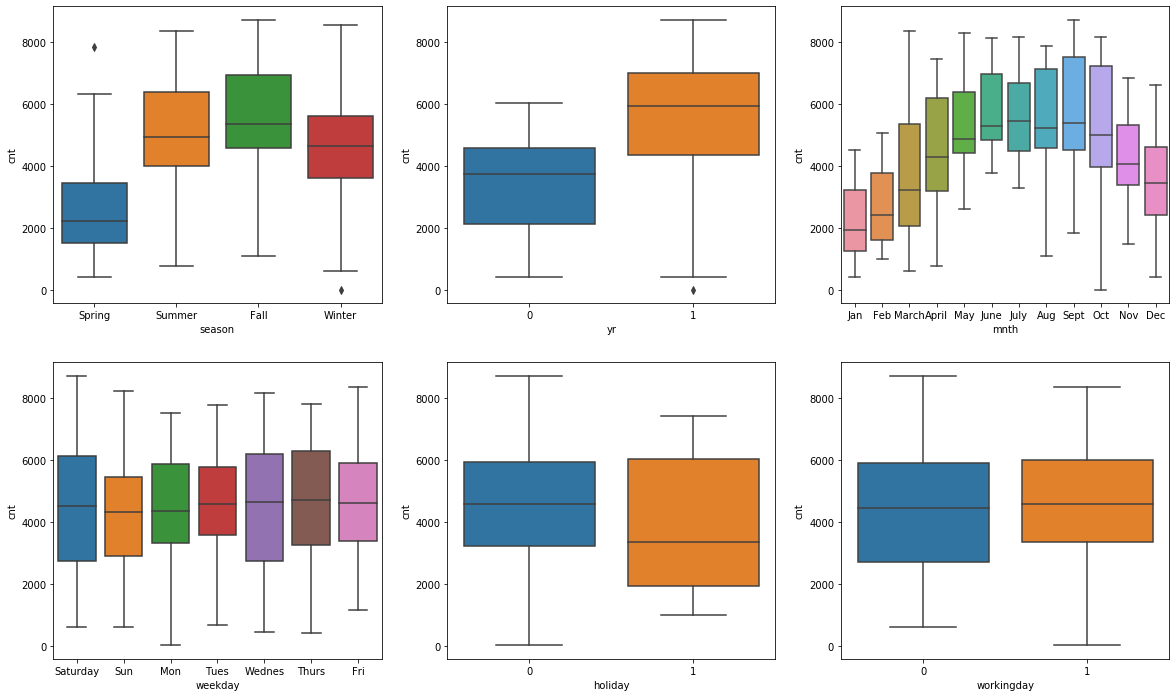

In [19]:
#Visualise categorical values and draw insights from it
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = day_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = day_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day_data)
plt.show()

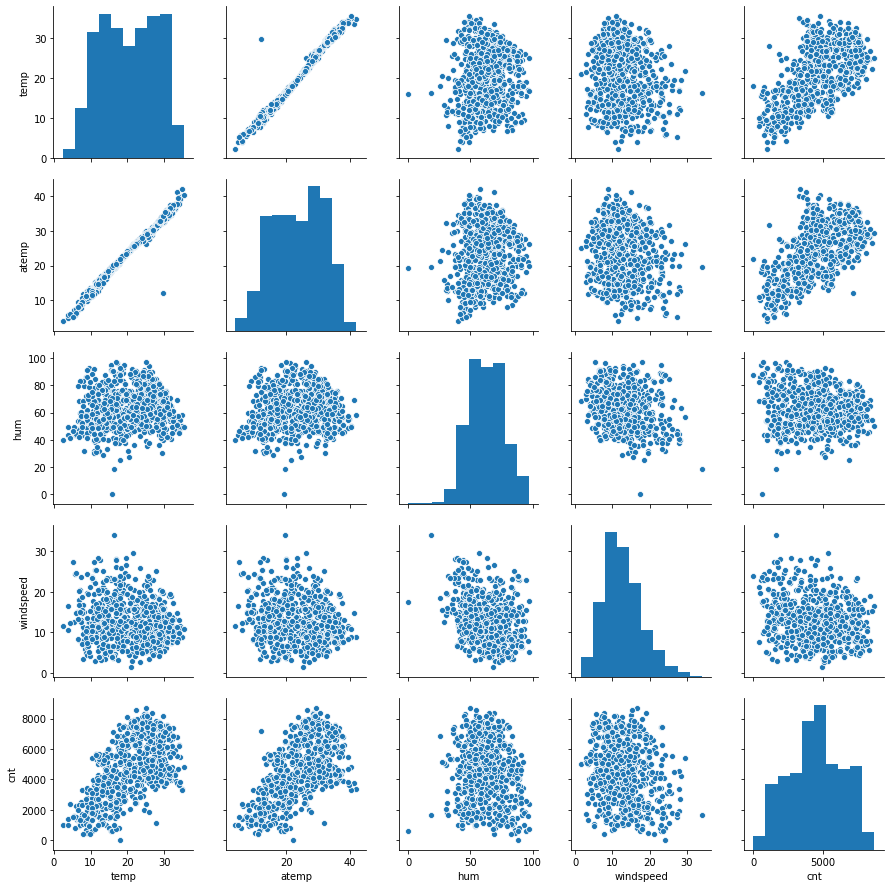

In [26]:
sns.pairplot(day_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

## Dummy Variables

#### The categorical values have a number of levels. We need to convert these levels into integer as well. For this, we will use something called dummy variables.

In [273]:
#Dummy Variables
day_data.head()

season  yr mnth  holiday   weekday  workingday weathersit       temp  \
0  Spring   0  Jan        0  Saturday           0       Mist  14.110847   
1  Spring   0  Jan        0       Sun           0       Mist  14.902598   
2  Spring   0  Jan        0       Mon           1      Clear   8.050924   
3  Spring   0  Jan        0      Tues           1      Clear   8.200000   
4  Spring   0  Jan        0    Wednes           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [274]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'dk'
dk = pd.get_dummies(day_data['weekday'])
dk

Fri  Mon  Saturday  Sun  Thurs  Tues  Wednes
0      0    0         1    0      0     0       0
1      0    0         0    1      0     0       0
2      0    1         0    0      0     0       0
3      0    0         0    0      0     1       0
4      0    0         0    0      0     0       1
..   ...  ...       ...  ...    ...   ...     ...
725    0    0         0    0      1     0       0
726    1    0         0    0      0     0       0
727    0    0         1    0      0     0       0
728    0    0         0    1      0     0       0
729    0    1         0    0      0     0       0

[730 rows x 7 columns]

In [275]:
dk = pd.get_dummies(day_data['weekday'], drop_first = True)

# Add the results to the original dataframe
day_data = pd.concat([day_data, dk], axis = 1)
day_data
day_data.head()
day_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Mon',
       'Saturday', 'Sun', 'Thurs', 'Tues', 'Wednes'],
      dtype='object')

In [276]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'month'
month = pd.get_dummies(day_data['mnth'])
month = pd.get_dummies(day_data['mnth'], drop_first = True)

# Add the results to the original dataframe
day_data = pd.concat([day_data, month], axis = 1)

day_data.head()

season  yr mnth  holiday   weekday  workingday weathersit       temp  \
0  Spring   0  Jan        0  Saturday           0       Mist  14.110847   
1  Spring   0  Jan        0       Sun           0       Mist  14.902598   
2  Spring   0  Jan        0       Mon           1      Clear   8.050924   
3  Spring   0  Jan        0      Tues           1      Clear   8.200000   
4  Spring   0  Jan        0    Wednes           1      Clear   9.305237   

      atemp      hum  ...  Dec  Feb  Jan  July  June  March  May  Nov  Oct  \
0  18.18125  80.5833  ...    0    0    1     0     0      0    0    0    0   
1  17.68695  69.6087  ...    0    0    1     0     0      0    0    0    0   
2   9.47025  43.7273  ...    0    0    1     0     0      0    0    0    0   
3  10.60610  59.0435  ...    0    0    1     0     0      0    0    0    0   
4  11.46350  43.6957  ...    0    0    1     0     0      0    0    0    0   

   Sept  
0     0  
1     0  
2     0  
3     0  
4     0  

[5 rows x 29 columns]

In [277]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'seas'
seas = pd.get_dummies(day_data['season'])
seas = pd.get_dummies(day_data['season'], drop_first = True)

# Add the results to the original dataframe
day_data = pd.concat([day_data, seas], axis = 1)

day_data.head()

season  yr mnth  holiday   weekday  workingday weathersit       temp  \
0  Spring   0  Jan        0  Saturday           0       Mist  14.110847   
1  Spring   0  Jan        0       Sun           0       Mist  14.902598   
2  Spring   0  Jan        0       Mon           1      Clear   8.050924   
3  Spring   0  Jan        0      Tues           1      Clear   8.200000   
4  Spring   0  Jan        0    Wednes           1      Clear   9.305237   

      atemp      hum  ...  July  June  March  May  Nov  Oct  Sept  Spring  \
0  18.18125  80.5833  ...     0     0      0    0    0    0     0       1   
1  17.68695  69.6087  ...     0     0      0    0    0    0     0       1   
2   9.47025  43.7273  ...     0     0      0    0    0    0     0       1   
3  10.60610  59.0435  ...     0     0      0    0    0    0     0       1   
4  11.46350  43.6957  ...     0     0      0    0    0    0     0       1   

   Summer  Winter  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

[5 rows x 32 columns]

In [278]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weather'
weather = pd.get_dummies(day_data['weathersit'])
weather = pd.get_dummies(day_data['weathersit'], drop_first = True)

# Add the results to the original dataframe
day_data = pd.concat([day_data, weather], axis = 1)

day_data.head()

season  yr mnth  holiday   weekday  workingday weathersit       temp  \
0  Spring   0  Jan        0  Saturday           0       Mist  14.110847   
1  Spring   0  Jan        0       Sun           0       Mist  14.902598   
2  Spring   0  Jan        0       Mon           1      Clear   8.050924   
3  Spring   0  Jan        0      Tues           1      Clear   8.200000   
4  Spring   0  Jan        0    Wednes           1      Clear   9.305237   

      atemp      hum  ...  March  May  Nov  Oct  Sept  Spring  Summer  Winter  \
0  18.18125  80.5833  ...      0    0    0    0     0       1       0       0   
1  17.68695  69.6087  ...      0    0    0    0     0       1       0       0   
2   9.47025  43.7273  ...      0    0    0    0     0       1       0       0   
3  10.60610  59.0435  ...      0    0    0    0     0       1       0       0   
4  11.46350  43.6957  ...      0    0    0    0     0       1       0       0   

   Light_Snow  Mist  
0           0     1  
1           0     1  
2           0     0  
3           0     0  
4           0     0  

[5 rows x 34 columns]

In [279]:
# Drop 'season','mnth','weekday','weathersit' as we have created the dummies for it
day_data.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
day_data.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   Mon  Saturday  ...  March  May  Nov  Oct  Sept  Spring  Summer  Winter  \
0    0         1  ...      0    0    0    0     0       1       0       0   
1    0         0  ...      0    0    0    0     0       1       0       0   
2    1         0  ...      0    0    0    0     0       1       0       0   
3    0         0  ...      0    0    0    0     0       1       0       0   
4    0         0  ...      0    0    0    0     0       1       0       0   

   Light_Snow  Mist  
0           0     1  
1           0     1  
2           0     0  
3           0     0  
4           0     0  

[5 rows x 30 columns]

In [426]:
#check columns
day_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Mon', 'Saturday', 'Sun', 'Thurs', 'Tues', 'Wednes', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Nov', 'Oct',
       'Sept', 'Spring', 'Summer', 'Winter', 'Light_Snow', 'Mist'],
      dtype='object')

## Splitting the Data into Training and Testing Sets

In [465]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(day_data, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [466]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [467]:
day_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Mon', 'Saturday', 'Sun', 'Thurs', 'Tues', 'Wednes', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Nov', 'Oct',
       'Sept', 'Spring', 'Summer', 'Winter', 'Light_Snow', 'Mist'],
      dtype='object')

In [468]:
# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  Mon  Saturday  ...  March  May  Nov  Oct  Sept  Spring  Summer  \
653  0.864243    0         0  ...      0    0    0    1     0       0       0   
576  0.827658    0         0  ...      0    0    0    0     0       0       0   
426  0.465255    0         1  ...      1    0    0    0     0       1       0   
728  0.204096    0         0  ...      0    0    0    0     0       1       0   
482  0.482973    0         1  ...      0    0    0    0     0       0       1   

     Winter  Light_Snow  Mist  
653       1           0     0  
576       0           0     0  
426       0           0     1  
728       0           0     0  
482       0           0     1  

[5 rows x 30 columns]

In [469]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  Mon  Saturday  ...  March  May  Nov  Oct  Sept  Spring  Summer  \
653  0.864243    0         0  ...      0    0    0    1     0       0       0   
576  0.827658    0         0  ...      0    0    0    0     0       0       0   
426  0.465255    0         1  ...      1    0    0    0     0       1       0   
728  0.204096    0         0  ...      0    0    0    0     0       1       0   
482  0.482973    0         1  ...      0    0    0    0     0       0       1   

     Winter  Light_Snow  Mist  
653       1           0     0  
576       0           0     0  
426       0           0     1  
728       0           0     0  
482       0           0     1  

[5 rows x 30 columns]

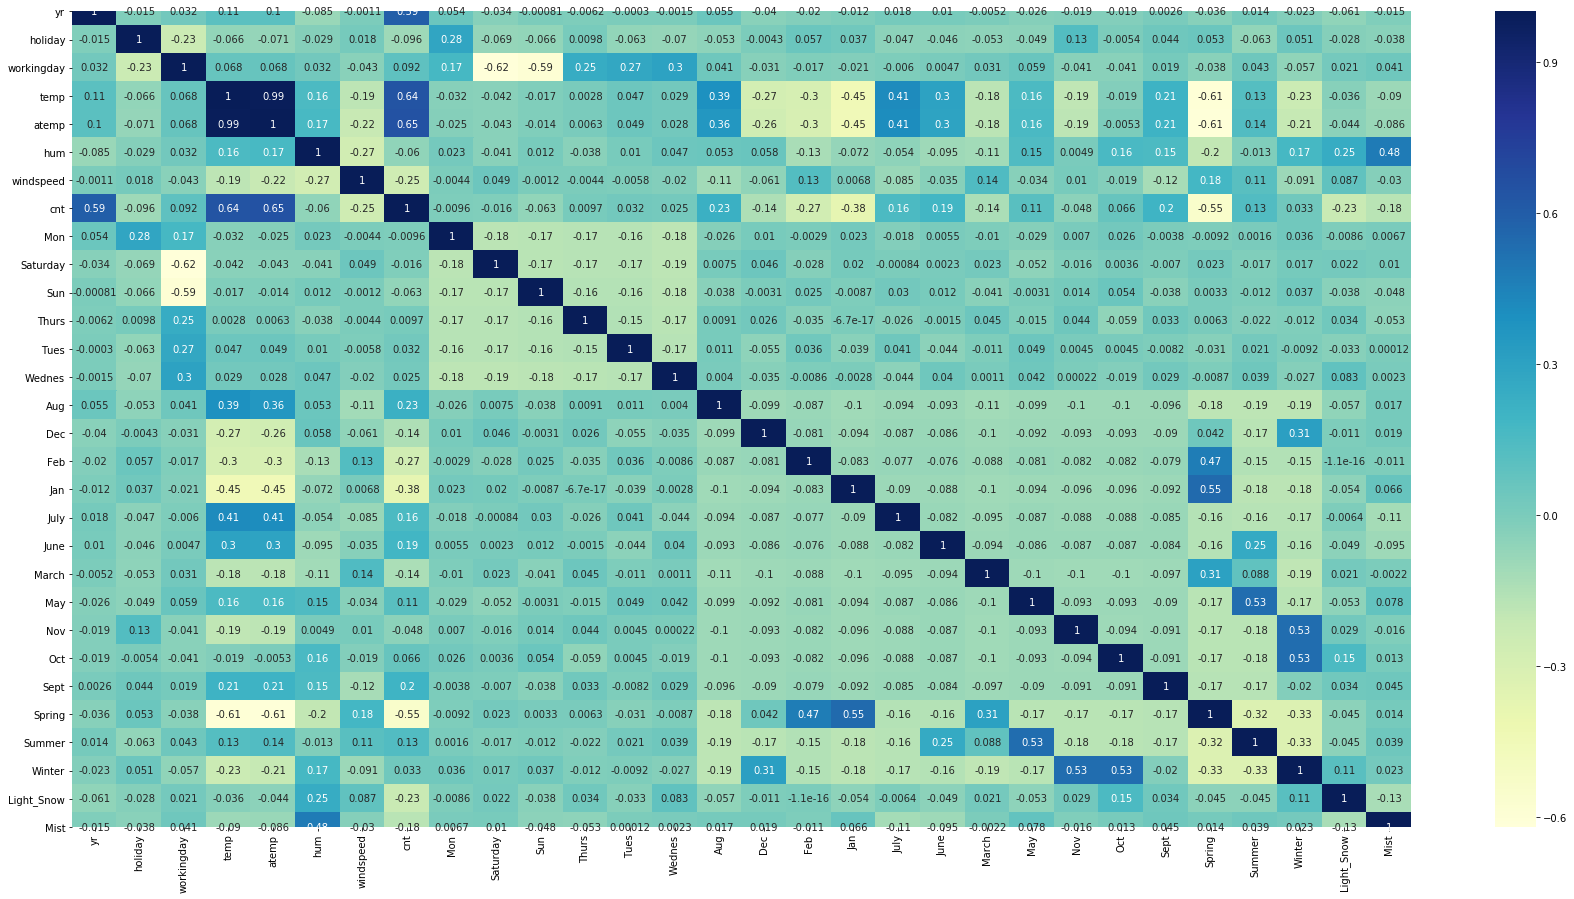

In [499]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Dividing into X and Y sets for the model building

In [431]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building Model
#### We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [432]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [433]:
# Running RFE with the output number of the variable equal to 13
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE
rfe = RFE(lm, 13)            
rfe = rfe.fit(X_train, y_train)

In [434]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Mon', False, 11),
 ('Saturday', True, 1),
 ('Sun', False, 10),
 ('Thurs', False, 14),
 ('Tues', False, 12),
 ('Wednes', False, 15),
 ('Aug', False, 9),
 ('Dec', False, 5),
 ('Feb', False, 6),
 ('Jan', False, 3),
 ('July', True, 1),
 ('June', False, 16),
 ('March', False, 17),
 ('May', False, 8),
 ('Nov', False, 4),
 ('Oct', False, 13),
 ('Sept', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Light_Snow', True, 1),
 ('Mist', True, 1)]

In [435]:
# We need only those columns who are RFE supported
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Saturday', 'July', 'Sept',
       'Spring', 'Summer', 'Winter', 'Light_Snow', 'Mist'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [472]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [473]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [474]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [475]:
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Fri, 17 Apr 2020   Prob (F-statistic):          7.51e-190
Time:                        01:35:01   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2796      0.035      8.096      0.0

#### `Saturday` is insignificant in presence of other variables; can be dropped

In [476]:
X_train_new = X_train_rfe.drop(["Saturday"], axis = 1)

In [477]:
####Rebuilding the model without bedrooms
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [478]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [479]:
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Fri, 17 Apr 2020   Prob (F-statistic):          1.69e-190
Time:                        01:35:08   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2841      0.034      8.242      0.0

In [480]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'July', 'Sept',
       'Spring', 'Summer', 'Winter', 'Light_Snow', 'Mist'],
      dtype='object')

In [481]:
X_train_m1 = X_train_new.drop(['const'], axis=1)

In [482]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_m1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3          hum  28.06
2         temp  16.02
4    windspeed   4.65
7       Spring   4.01
9       Winter   3.35
8       Summer   2.78
11        Mist   2.28
0           yr   2.08
5         July   1.58
6         Sept   1.38
10  Light_Snow   1.24
1      holiday   1.04

#### Since VIF value of hum is 28, it means hum is correlated with other variables

##### Therefore we build a new model after dropping "hum"

In [483]:
X_train_new = X_train_m1.drop(["hum"], axis = 1)

In [484]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [485]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [486]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Fri, 17 Apr 2020   Prob (F-statistic):          2.40e-187
Time:                        01:35:30   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.0

In [490]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2         temp  5.09
3    windspeed  4.60
7       Summer  2.21
6       Spring  2.08
0           yr  2.07
8       Winter  1.79
4         July  1.58
10        Mist  1.55
5         Sept  1.34
9   Light_Snow  1.08
1      holiday  1.04

#### Since VIF value of temp is 5, but as we noticed earlier temp was an important feature which had a high correlation with the target variable, which it means there must be other variables which are related with temp.

#### Our aim is to identify this variable instead of dropping 'temp'. Therefore we consider 'windspeed' build a new model after dropping 'windspeed'

In [491]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'July', 'Sept', 'Spring',
       'Summer', 'Winter', 'Light_Snow', 'Mist'],
      dtype='object')

In [492]:
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

In [493]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [494]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [495]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Fri, 17 Apr 2020   Prob (F-statistic):          2.80e-181
Time:                        01:36:57   Log-Likelihood:                 481.98
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     499   BIC:                            -895.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1503      0.029      5.134      0.0

In [497]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2        temp  4.22
0          yr  2.06
6      Summer  1.93
3        July  1.58
7      Winter  1.58
9        Mist  1.55
5      Spring  1.40
4        Sept  1.34
8  Light_Snow  1.07
1     holiday  1.04

#### We see a considerable drop in the VIF but we are looking at getting this value around 2-3. Therefore we consider 'July' build a new model after dropping 'July'


In [501]:
X_train_new = X_train_new.drop(["July"], axis = 1)

In [502]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [503]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [504]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Fri, 17 Apr 2020   Prob (F-statistic):          6.89e-181
Time:                        01:57:12   Log-Likelihood:                 478.19
No. Observations:                 510   AIC:                            -936.4
Df Residuals:                     500   BIC:                            -894.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1415      0.029      4.833      0.0

In [505]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2        temp  2.89
0          yr  2.06
5      Summer  1.62
8        Mist  1.54
6      Winter  1.44
4      Spring  1.33
3        Sept  1.23
7  Light_Snow  1.07
1     holiday  1.04

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [506]:
y_train_cnt = lm.predict(X_train_lm)

In [507]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

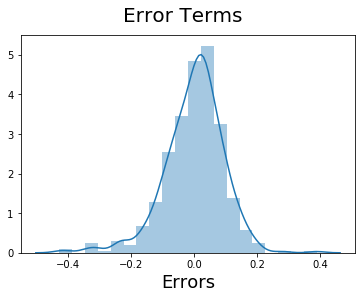

In [508]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

### Applying the scaling on the test sets

In [509]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [510]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [511]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [512]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Calculating the R-squared score on the test set.

#### where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.

In [513]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8088172921479285

Text(0, 0.5, 'y_pred')

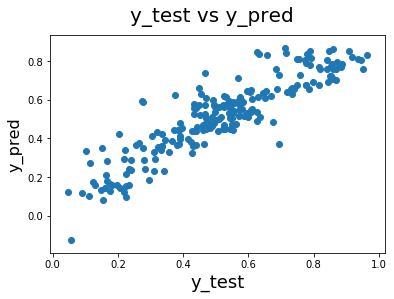

In [514]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label